In [43]:
# To find out market inefficiencies based on volumnes  : Considering (High-low) and (close-open)

In [44]:
# Start by importing NumPy and vectorbt. You’ll use SciPy to test the statistical significance of the results.
import numpy as np
import warnings
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
warnings.simplefilter('ignore', FutureWarning)
import pandas_datareader as pdr

In [45]:
import pandas as pd
from datetime import datetime
from iexfinance.stocks import Stock
from iexfinance.stocks import get_historical_data

# Define the API key
IEX_CLOUD_API_TOKEN = ''

# Define the start and end date
start_date = datetime(2023, 1, 15)
# Define the symbol
symbol = 'MSFT'

# Download the historical data
price = get_historical_data(symbol, start=start_date, end=None, output_format='pandas', token=IEX_CLOUD_API_TOKEN)

# Print the DataFrame
print(price)

             close     high     low     open   priceDate symbol    volume   
2023-01-17  240.35   240.91  237.09   237.97  2023-01-17   MSFT  29831257  \
2023-01-18  235.81   242.38  235.52  241.565  2023-01-18   MSFT  30028692   
2023-01-19  231.93   235.52  230.68   233.78  2023-01-19   MSFT  28623033   
2023-01-20  240.22   240.74  234.51  234.855  2023-01-20   MSFT  35389809   
2023-01-23  242.58  245.165  239.65    241.1  2023-01-23   MSFT  31933951   
...            ...      ...     ...      ...         ...    ...       ...   
2023-04-25  275.42    281.6  275.37   279.51  2023-04-25   MSFT  45772236   
2023-04-26  295.37   299.57  292.73    296.7  2023-04-26   MSFT  64599182   
2023-04-27  304.83    305.2  295.25   295.97  2023-04-27   MSFT  46462638   
2023-04-28  307.26   308.93  303.31   304.01  2023-04-28   MSFT  36469613   
2023-05-01  305.56    308.6  305.15   306.97  2023-05-01   MSFT  21294115   

                           id   key subkey  ...    uLow   uVolume    fOpen 

In [46]:
price['vol/high-low']= price["volume"]/(price["high"] -price["low"])
price['vol/close-open']= price["volume"]/(price["close"] -price["open"])
price["vol/high-low"]

2023-01-17    7809229.581152
2023-01-18    4377360.349854
2023-01-19    5913849.793388
2023-01-20    5680547.191011
2023-01-23    5790380.961015
                   ...      
2023-04-25    7347068.378812
2023-04-26    9444324.853801
2023-04-27    4669611.859296
2023-04-28    6489254.982206
2023-05-01    6172207.246377
Name: vol/high-low, Length: 73, dtype: object

In [47]:
price['vol/close-open']

2023-01-17    12534141.596639
2023-01-18    -5217843.961772
2023-01-19    -15471909.72973
2023-01-20     6596422.926375
2023-01-23    21576993.918919
                   ...       
2023-04-25   -11191255.745721
2023-04-26   -48570813.533835
2023-04-27      5244090.06772
2023-04-28    11221419.384615
2023-05-01   -15102209.219858
Name: vol/close-open, Length: 73, dtype: object

<Axes: >

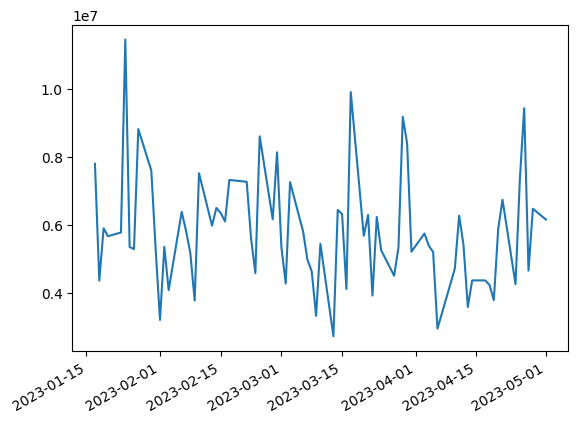

In [48]:
price["vol/high-low"].plot()

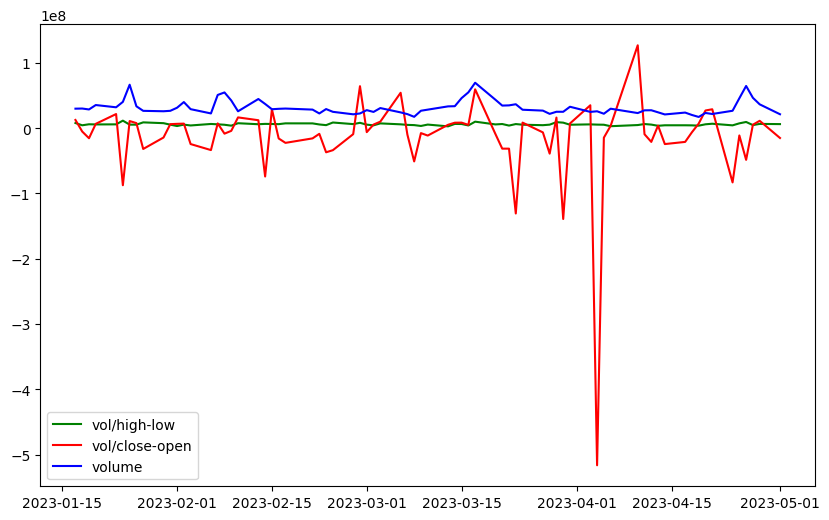

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
# Plot both variables on the same plot
ax.plot(price["vol/high-low"], label='vol/high-low', color="green")
ax.plot(price["vol/close-open"], label='vol/close-open',color="Red")
ax.plot(price['volume'], label='volume', color="blue")
ax.legend() 
plt.show()

In [50]:
# Vol/(close-open) is showing abnormal behaviour with respect to volume and Volume /(High-low) graphs.

In [51]:
# Considering difference of Close and open
closeopen=price["vol/close-open"].sort_values(ascending=False)#Good to go long on the having least negative values on 4th April
closeopen.tail(3)

2023-03-23   -130753139.285727
2023-03-30   -139185611.111106
2023-04-04   -516485979.999883
Name: vol/close-open, dtype: object

In [52]:
closeopen.head(3) # Good to Short  on these days, having high positive  value,  10th April - short with 1.5% Reward for 1% Risk

2023-04-10    126939527.472556
2023-02-28     64259857.142858
2023-03-17     59425103.418803
Name: vol/close-open, dtype: object

In [53]:
# Considering difference of High and low
highlow=price["vol/high-low"].sort_values(ascending=False) # Good to go long on the having least positive values 
highlow.tail(3)

2023-02-01    3219352.420185
2023-04-06    2962222.288557
2023-03-13    2737251.313629
Name: vol/high-low, dtype: object

In [54]:
highlow.head(3) # Good to Short Apple on these days, having high positive  value

2023-01-24    11462804.558405
2023-03-17     9918454.043567
2023-04-26     9444324.853801
Name: vol/high-low, dtype: object

In [55]:
################################################ The End ############################################################